In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn import preprocessing

In [4]:
df=pd.read_csv("admission.csv")

### Q1. Perform Exploratory Data Analysis (EDA) tasks

<br>a) Visualize the 10 random rows of the data set
<br>b) Generate the description for numeric variables
<br>c) Check the shape of the data set
<br>d) Generate the correlation matrix
<br>e) Generate a correlogram

In [5]:
# Get 10 random rows from the DataFrame
random_rows = df.sample(n=10)

# Display the randomly selected rows
print(random_rows)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
145         146        320          113                  2  2.0   2.5  8.64   
83           84        322          115                  5  4.0   4.5  9.36   
237         238        329          114                  5  4.5   5.0  9.19   
196         197        306          105                  2  3.0   2.5  8.26   
450         451        320          112                  4  3.0   4.5  8.86   
413         414        317          101                  3  3.0   2.0  7.94   
382         383        324          110                  4  4.5   4.0  9.15   
458         459        312          100                  1  3.0   3.0  8.53   
88           89        314          108                  3  4.5   3.5  8.14   
250         251        320          104                  3  3.0   2.5  8.57   

     Research  Chance of Admit   
145         1              0.81  
83          1              0.92  
237         1              0

In [ ]:
b) Generate the description for numeric variables


In [6]:
# Generate descriptions for numeric variables
numeric_description = df.describe()

# Display the description
print(numeric_description)

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
2

In [ ]:
c) Check the shape of the data set


In [7]:
# Check the shape of the DataFrame
data_shape = df.shape

# Display the shape (number of rows and columns)
print("Number of rows:", data_shape[0])
print("Number of columns:", data_shape[1])

Number of rows: 500
Number of columns: 9


In [ ]:
d) Generate the correlation matrix


In [8]:
# Generate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.103839    -0.141696          -0.067641   
GRE Score           -0.103839   1.000000     0.827200           0.635376   
TOEFL Score         -0.141696   0.827200     1.000000           0.649799   
University Rating   -0.067641   0.635376     0.649799           1.000000   
SOP                 -0.137352   0.613498     0.644410           0.728024   
LOR                 -0.003694   0.524679     0.541563           0.608651   
CGPA                -0.074289   0.825878     0.810574           0.705254   
Research            -0.005332   0.563398     0.467012           0.427047   
Chance of Admit      0.008505   0.810351     0.792228           0.690132   

                        SOP      LOR       CGPA  Research  Chance of Admit   
Serial No.        -0.137352 -0.003694 -0.074289 -0.005332          0.008505  
GRE Score          0.613498  0.524679  0.825878  0.563398          0.810351  
TOEFL

In [ ]:
e) Generate a correlogram


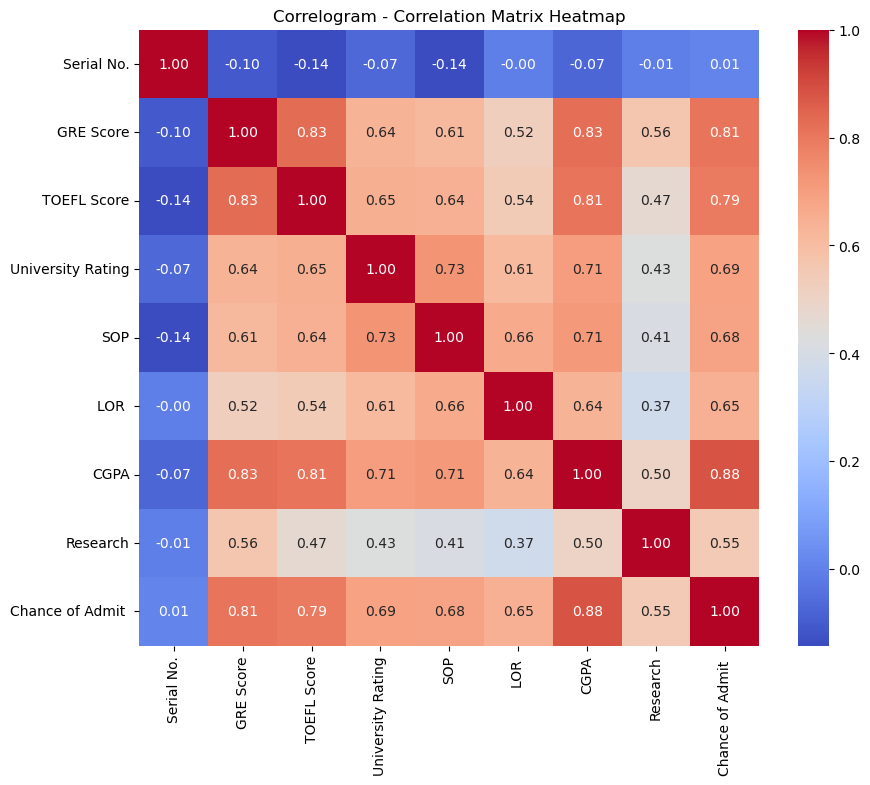

In [9]:
# Generate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix (correlogram)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlogram - Correlation Matrix Heatmap")
plt.show()

### Q.2 Find out the minimum and maximum values for GRE score


In [10]:
# Find the minimum and maximum GRE scores
min_GRE_score = df['GRE Score'].min()
max_GRE_score = df['GRE Score'].max()

print("Minimum GRE Score:", min_GRE_score)
print("Maximum GRE Score:", max_GRE_score)

Minimum GRE Score: 290
Maximum GRE Score: 340


### Q.3 Find out the percentage of universities for each university rating

In [11]:
# Group the data by 'University Rating' and count the occurrences
rating_counts = df['University Rating'].value_counts()

# Calculate the total number of universities
total_universities = len(df)

# Calculate the percentage for each rating
percentage_per_rating = (rating_counts / total_universities) * 100

# Display the percentage of universities for each rating
print(percentage_per_rating)

3    32.4
2    25.2
4    21.0
5    14.6
1     6.8
Name: University Rating, dtype: float64


### Q.4 Convert the target variable “Chance of Admit” to categorical having values 0 and 1,such that :
<br>Students having the “Chance of Admit” value &gt; 0.80, are assigned value 1, and
<br>Students having the “Chance of Admit” value &lt; 0.80, are assigned value 0
<br>Where 0: Low chance of Admission and 1: High chance of admission

In [14]:
# Assuming you've already read the data into the 'df' DataFrame as you mentioned
# If the column name is different, replace 'Chance of Admit' with the actual column name.

# Define a function to categorize the values
def categorize_admission(chance):
    if chance > 0.80:
        return 1
    else:
        return 0

# Apply the function to create a new column 'Admission Category'
df['Admission Category'] = df['Chance of Admit '].apply(categorize_admission)

# Display the DataFrame with the new 'Admission Category' column
print(df)


     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   Admission Category

In [14]:
<br>Where 0: Low chance of Admission and 1: High chance of admission

In [15]:
# Define a function to categorize the values
def categorize_admission(chance):
    if chance > 0.80:
        return "High chance of admission"
    else:
        return "Low chance of Admission"

# Apply the function to create a new column 'Admission Category'
df['Admission Category'] = df['Chance of Admit '].apply(categorize_admission)

# Display the DataFrame with the new 'Admission Category' column
print(df)


     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit         Admission Ca

### Q.5 Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model.

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(['Chance of Admit ', 'Admission Category'], axis=1)  # Features
y = df['Admission Category']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [19]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to build the final classifier
final_clf = DecisionTreeClassifier(**best_params)
final_clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = final_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.93
                          precision    recall  f1-score   support

High chance of admission       0.86      0.89      0.87        27
 Low chance of Admission       0.96      0.95      0.95        73

                accuracy                           0.93       100
               macro avg       0.91      0.92      0.91       100
            weighted avg       0.93      0.93      0.93       100

Confusion Matrix:
[[24  3]
 [ 4 69]]
